In [1]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from scipy import linalg
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from scipy import io
import random
import statistics
import matplotlib.pyplot as plt

In [2]:
x1 = [0.2, 3.1, 1]
x2 = [1.0, 3.0, 1]
x3 = [-0.2, 1.2, 1]
x4 = [1.0, 1.1, 1]
w0 = [-1, 1, 0]
y = [1, 1, 0, 0]
y = np.asarray(y)

X = [x1, x2, x3, x4]
X = np.asarray(X)

In [3]:
def s(z):
    return 1 / (1 + np.exp(-z))

In [4]:
def next_s(X, w):
    res = np.matmul(X, w)
    s_next = s(res)
    return s_next

In [5]:
def next_w(X, y, w, s_i):
    omega = np.diag(s0 * (1-s0))
    h = X.T @ omega @ X
    inv_h = np.linalg.inv(h)
    mat = inv_h @ X.T @ (y - s_i)
    return w + mat

### Part a

In [6]:
s0 = next_s(X, w0)
s0

array([0.94784644, 0.88079708, 0.80218389, 0.52497919])

### Part b

In [7]:
w1 = next_w(X, y, w0, s0)
w1

array([ 1.32465198,  3.04991697, -6.82910388])

### Part c

In [8]:
s1 = next_s(X, w1)
s1

array([0.94737826, 0.97455097, 0.03124556, 0.10437391])

### Part d

In [9]:
w2 = next_w(X, y, w1, s1)
w2

array([ 1.06902047,  3.52252931, -7.56418584])

# Question 3: Wine Classification with Logistic Regression

In [10]:
wineData = scipy.io.loadmat('data.mat')

In [11]:
wine_X = wineData['X']
labels = wineData['y']
test = wineData['X_test']

In [12]:
# Normalizing the data
train_mean = np.mean(wine_X, axis=0)
train_std = np.std(wine_X, axis=0)
wine_training = (wine_X - train_mean) / train_std

test_mean = np.mean(test, axis=0)
test_std = np.std(test, axis=0)
wine_test = (test - test_mean) / test_std

wine_training = np.c_[wine_training, np.ones(len(wine_training))]
wine_test = np.c_[wine_test, np.ones(len(wine_test))]

## Part 2: Batch Gradient Descent

In [13]:
random.seed(10)

In [14]:
def shuffle_data(array1, array2, num):
    merged_list = list(zip(array1, array2))
    
    shuffled = random.sample(merged_list, len(merged_list))
    
    unfiltered_training, unfiltered_val = shuffled[num:], shuffled[:num]
    
    X_training_data, y_training_labels = zip(*unfiltered_training)
    X_validation_data, y_validation_labels = zip(*unfiltered_val)
    
    return np.asarray(X_training_data), np.asarray(y_training_labels), np.asarray(X_validation_data), np.asarray(y_validation_labels)

In [15]:
training, training_labels, validation, validation_labels = shuffle_data(wine_training, labels, 1000)

In [16]:
def sigmoid_one(z):
    return 1 / (1 + np.exp(-z))

In [17]:
def sigmoid(z):
    return scipy.special.expit(z)

In [18]:
def cost_fun(X, y, lam, w):
    J = (- y.T @ np.log(sigmoid(X @ w))) - ((1 - y).T @ np.log(1 - sigmoid(X @ w))) + (lam * linalg.norm(w, 2)**2)
    return J 

In [19]:
def gradient_descent(alpha, lam, X, y, iterations):
    w = np.ones((X.shape[1], 1))
    cost = []
    for i in np.arange(iterations):
        J = cost_fun(X, y, lam, w)
        #J = (- y.T @ np.log(sigmoid(X @ w))) - ((1 - y).T @ np.log(1 - sigmoid(X @ w))) + (lam * linalg.norm(w, 2)**2)
        gradient = (-X.T @ (y - sigmoid(X @ w))) + (lam*w)
        w = w - (alpha * gradient) # update rule
        cost.append(J)
    
    c1 = [num for sublist in cost for num in sublist]
    c2 = [num for sublist in c1 for num in sublist]
        
    return w.reshape(-1,) , c2

In [20]:
lam = .1
alpha = 0.0001
X = training
y = training_labels
iterations = 10000

w_final, cost = gradient_descent(alpha, lam, X, y, iterations)
w_final = w_final.reshape(-1,)

/var/folders/83/28lw4ls96vgf72zr4g5ld9d80000gn/T/ipykernel_36112/3303445312.py:2: RuntimeWarning: divide by zero encountered in log
  J = (- y.T @ np.log(sigmoid(X @ w))) - ((1 - y).T @ np.log(1 - sigmoid(X @ w))) + (lam * linalg.norm(w, 2)**2)


In [21]:
predicted_label = (sigmoid((X @ w_final)) >= 0.5).astype(int).reshape(-1,)
training_labels = training_labels.reshape(-1,).astype(int)
(training_labels == predicted_label).astype(int).mean()

0.9938

In [22]:
predicted_label = (sigmoid(validation @ w_final) >= 0.5).astype(int).reshape(-1,)
validation_labels = validation_labels.reshape(-1,).astype(int)
(validation_labels == predicted_label).astype(int).mean()

0.994

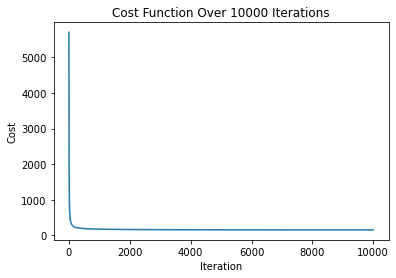

In [23]:
x_axis = np.arange(10000)

plt.plot(x_axis, cost)
plt.title('Cost Function Over 10000 Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

## Part 4: Stochastic Gradient Descent

In [24]:
def s(z):
    return 1 / (1 + np.exp(-z))

In [25]:
w = np.ones((X[0].shape[0], 1))

In [26]:
def stochastic_gd(alpha, lam, X, y, iterations):
    w = np.ones((13, 1))
    cost = []

    for i in np.arange(iterations):
        idx = random.randint(0, 2999)
        X_i = X[idx]
        y_i = y[idx]
        x_resized = np.reshape(X_i, (1, 13))
        sf = np.reshape(s(x_resized @ w), (1, 1))
        y_i = np.reshape(y_i, (1, 1))

        J = (- y.T @ np.log(sigmoid(X @ w))) - ((1 - y).T @ np.log(1 - sigmoid(X @ w))) + (lam * linalg.norm(w, 2)**2)
        gradient = (-x_resized.T @ (y_i - sf)) + (2*lam*w)
        w = w - (alpha * gradient) # update rule
        cost.append(J)
    
    c1 = [num for sublist in cost for num in sublist]
    
    return w, c1

In [27]:
alpha = 0.0001
lam = 10
iterations = 10000
X = training
y = training_labels
cost = []

w_final, cost = stochastic_gd(alpha, lam, X, y, iterations)

/var/folders/83/28lw4ls96vgf72zr4g5ld9d80000gn/T/ipykernel_36112/2800110948.py:13: RuntimeWarning: divide by zero encountered in log
  J = (- y.T @ np.log(sigmoid(X @ w))) - ((1 - y).T @ np.log(1 - sigmoid(X @ w))) + (lam * linalg.norm(w, 2)**2)


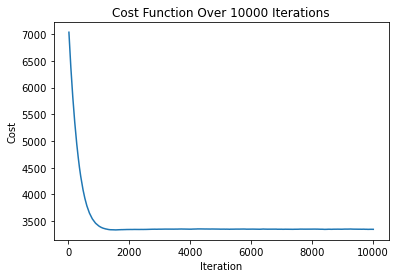

In [28]:
plt.plot(np.arange(iterations), cost)
plt.title('Cost Function Over 10000 Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

In [29]:
pred_y = (sigmoid((X @ w_final)) >= 0.5).astype(int)
pred_y = pred_y.reshape(-1,)
training_labels = training_labels.reshape(-1,).astype(int)
(training_labels == pred_y).astype(int).mean()

0.9562

In [30]:
pred_y = (sigmoid(validation @ w_final) >= 0.5).astype(int)
pred_y = pred_y.reshape(-1,)
validation_labels = validation_labels.reshape(-1,).astype(int)
(validation_labels == pred_y).astype(int).mean()

0.961

## Part 5: Shrinking Step Size

In [31]:
def stochastic_gd_shrink(alpha, lam, X, y, iterations):
    w = np.ones((13, 1))
    cost = []

    for i in np.arange(iterations):
        lam = lam / (i + 1)
        idx = random.randint(0, 2999)
        X_i = X[idx]
        y_i = y[idx]
        x_resized = np.reshape(X_i, (1, 13))
        sf = np.reshape(s(x_resized @ w), (1, 1))
        y_i = np.reshape(y_i, (1, 1))

        J = (- y.T @ np.log(sigmoid(X @ w))) - ((1 - y).T @ np.log(1 - sigmoid(X @ w))) + (lam * linalg.norm(w, 2)**2)
        gradient = (-x_resized.T @ (y_i - sf)) + (2*lam*w)
        w = w - (alpha * gradient) # update rule
        cost.append(J)
    
    c1 = [num for sublist in cost for num in sublist]
    
    return c1

In [51]:
alpha = 0.001
lam = .1
iterations = 10000
X = training
y = training_labels
cost = []

cost = stochastic_gd_shrink(alpha, lam, X, y, iterations)

/var/folders/83/28lw4ls96vgf72zr4g5ld9d80000gn/T/ipykernel_36112/2401646103.py:14: RuntimeWarning: divide by zero encountered in log
  J = (- y.T @ np.log(sigmoid(X @ w))) - ((1 - y).T @ np.log(1 - sigmoid(X @ w))) + (lam * linalg.norm(w, 2)**2)


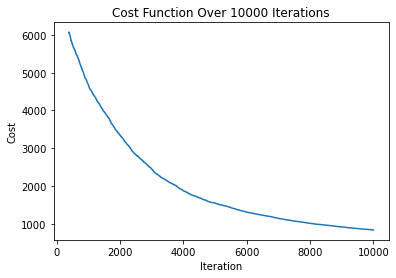

In [52]:
plt.plot(np.arange(iterations), cost)
plt.title('Cost Function Over 10000 Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

## Part 6: Kaggle

In [40]:
test = wineData["X_test"]
lam = 0.1
alpha = .0001
w = np.ones((test.shape[1], 1))
iterations = 50000

X = wineData["X"]
y = wineData["y"]

w_final, cost = gradient_descent(alpha, lam, X, y, iterations)
    
prediction = (sigmoid(test @ w_final) >= 0.5).astype(int)
prediction = prediction.reshape(-1,)
prediction

/var/folders/83/28lw4ls96vgf72zr4g5ld9d80000gn/T/ipykernel_36112/3303445312.py:2: RuntimeWarning: divide by zero encountered in log
  J = (- y.T @ np.log(sigmoid(X @ w))) - ((1 - y).T @ np.log(1 - sigmoid(X @ w))) + (lam * linalg.norm(w, 2)**2)
/var/folders/83/28lw4ls96vgf72zr4g5ld9d80000gn/T/ipykernel_36112/3303445312.py:2: RuntimeWarning: invalid value encountered in matmul
  J = (- y.T @ np.log(sigmoid(X @ w))) - ((1 - y).T @ np.log(1 - sigmoid(X @ w))) + (lam * linalg.norm(w, 2)**2)


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [41]:
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv('sub4.csv', index_label='Id')

In [42]:
results_to_csv(prediction)

Kaggle username: nadaleek

Wine Score: 0.95564

lambda: 0.1

alpha: 0.0001

random.seed(10)

I used batch gradient descent for my classifier. It produces the most accuract results compared to stochastic gradient descent. I calculated the cost function and iterated though 50000 times to train the data.

# Question 5: l1, l2 Regularization and Sparsity

## Part 1

### a.)

Text(0.5, 1.0, 'l 0.5')

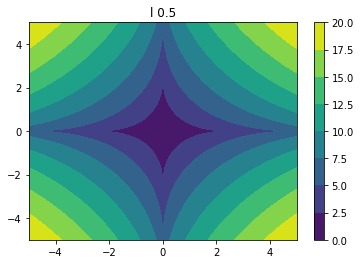

In [37]:
w1 = np.linspace(-5, 5, 600)
w2 = np.linspace(-5, 5, 600)
X, Y = np.meshgrid(w1, w2)
p = 0.5

Z = (np.abs(X)**(p) + np.abs(Y)**(p))**(1/p)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.title('l 0.5')

### b.)

Text(0.5, 1.0, 'l1')

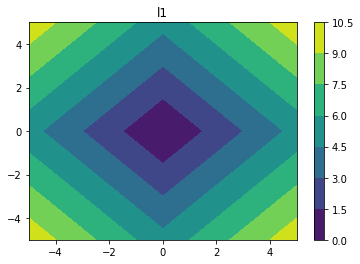

In [38]:
w1 = np.linspace(-5, 5, 600)
w2 = np.linspace(-5, 5, 600)
X, Y = np.meshgrid(w1, w2)
p = 1

Z = (np.abs(X)**(p) + np.abs(Y)**(p))**(1/p)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.title('l1')

### c.)

Text(0.5, 1.0, 'l2')

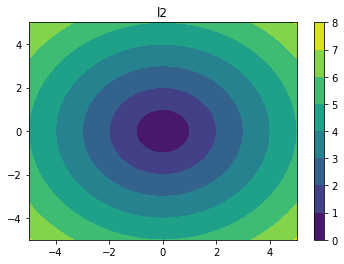

In [39]:
w1 = np.linspace(-5, 5, 600)
w2 = np.linspace(-5, 5, 600)
X, Y = np.meshgrid(w1, w2)
p = 2

Z = (np.abs(X)**(p) + np.abs(Y)**(p))**(1/p)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.title('l2')